In [1]:
import math
import os
import re
import altair as alt
import numpy as np
import pandas as pd
import scipy.stats
import yaml
import neutcurve
import scipy.stats
print(f"Using `neutcurve` version {neutcurve.__version__}")
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import linregress

# allow more rows for Altair
_ = alt.data_transformers.disable_max_rows()

#import altair themes from /data/custom_analyses_data/theme.py and enable
import theme
alt.themes.register('main_theme', theme.main_theme)
alt.themes.enable('main_theme')
from pathlib import Path

repo_root = Path.cwd().parent
os.chdir(repo_root)
print(os.getcwd())
#print(os.listdir("raw_plate_reader"))
plt.rcParams['svg.fonttype'] = 'none' #from bernadeta, for correct font svg output
from IPython.display import display, HTML, SVG

from neutcurve.colorschemes import CBPALETTE
from neutcurve.colorschemes import CBMARKERS

from plotnine import *

import yaml

print(f"Using `neutcurve` version {neutcurve.__version__}")
plt.rcParams['svg.fonttype'] = 'none'

Using `neutcurve` version 2.1.0
/fh/fast/bloom_j/computational_notebooks/tmcmahon/2024/02_RSV/RSV_evolution_neut
Using `neutcurve` version 2.1.0


In [3]:
df = pd.read_csv('01_data/other/2025.05.08_fractinfect_Long_A549_TIM1.csv')

In [4]:
fits = neutcurve.curvefits.CurveFits(
            data=df,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

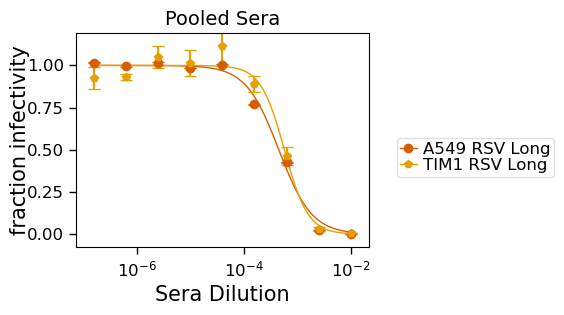

In [5]:
fig,axes = fits.plotSera(
            xlabel='Sera Dilution', colors = ['#D55E00','#E69F00',
                                                                                    '#762A83','#CC79A7','#0072B2','#56B4E9','#009E73', 
                                                                                    '#1B7837', '#000000', '#F0E442',
                                                                                    '#999999'],   
            markers = ['o', 'p', 'v', 's', 'o', '^', 'D', 's', 'v', '8', 's'],
            draw_in_bounds=True, ncol=3
)
fig.savefig('03_output/plots/Neut_Long_CellLine_sera.pdf', dpi=100, bbox_inches='tight')
fig.savefig('03_output/plots/Neut_Long_CellLine_sera.svg',bbox_inches='tight')




In [6]:
fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])
fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

,serum,virus,replicate,nreplicates,ic10,ic10_bound,ic10_str,ic50,ic50_bound,ic50_str,...,ic99_bound,ic99_str,midpoint,midpoint_bound,midpoint_bound_type,slope,top,bottom,r2,rmsd
0,Pooled Sera,A549 RSV Long,average,2,0.000094,interpolated,9.36e-05,0.000446,interpolated,0.000446,...,lower,>0.01,0.000446,0.000446,interpolated,1.406717,1.0,0.0,0.993739,0.032145
1,Pooled Sera,TIM1 RSV Long,average,2,0.000185,interpolated,0.000185,0.000567,interpolated,0.000567,...,interpolated,0.00594,0.000567,0.000567,interpolated,1.956748,1.0,0.0,0.980950,0.056652


In [6]:
fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99]).to_csv("03_output/processed_data/sera_A549_ICs.csv")